In [1]:
import sys
sys.path.append("..")
from utils import fit_and_plot, montecarlo_estimator
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/5CL Lab 2 - 1.3.csv")
df

,Angle,Angle Uncertainty,Intensity,Uncertainty,Unnamed: 4
0,0,2,1656.00,2.000,NaN
1,15,2,3007.00,2.240,NaN
2,30,2,4321.00,1.470,NaN
3,45,2,5242.00,3.650,NaN
4,60,2,5483.00,1.557,NaN
5,75,2,4976.00,1.560,NaN
6,90,2,4007.00,2.060,NaN
7,105,2,2572.00,1.408,NaN
8,120,2,1235.00,1.102,NaN
9,135,2,284.20,0.800,NaN


In [3]:
class ExpModel:
    def forward(self, theta, theta0, I0, Ibg):
        return Ibg + I0*np.square(np.cos(theta - theta0))
    def backward(self, theta, theta0, I0, Ibg):
        return -I0*np.sin(2*(theta - theta0))
expmodel = ExpModel()

[[-8.41878482e+00  7.65851988e-03]
 [ 5.45651793e+03  1.65568854e+01]
 [ 5.25790675e+00  1.11695066e+01]]


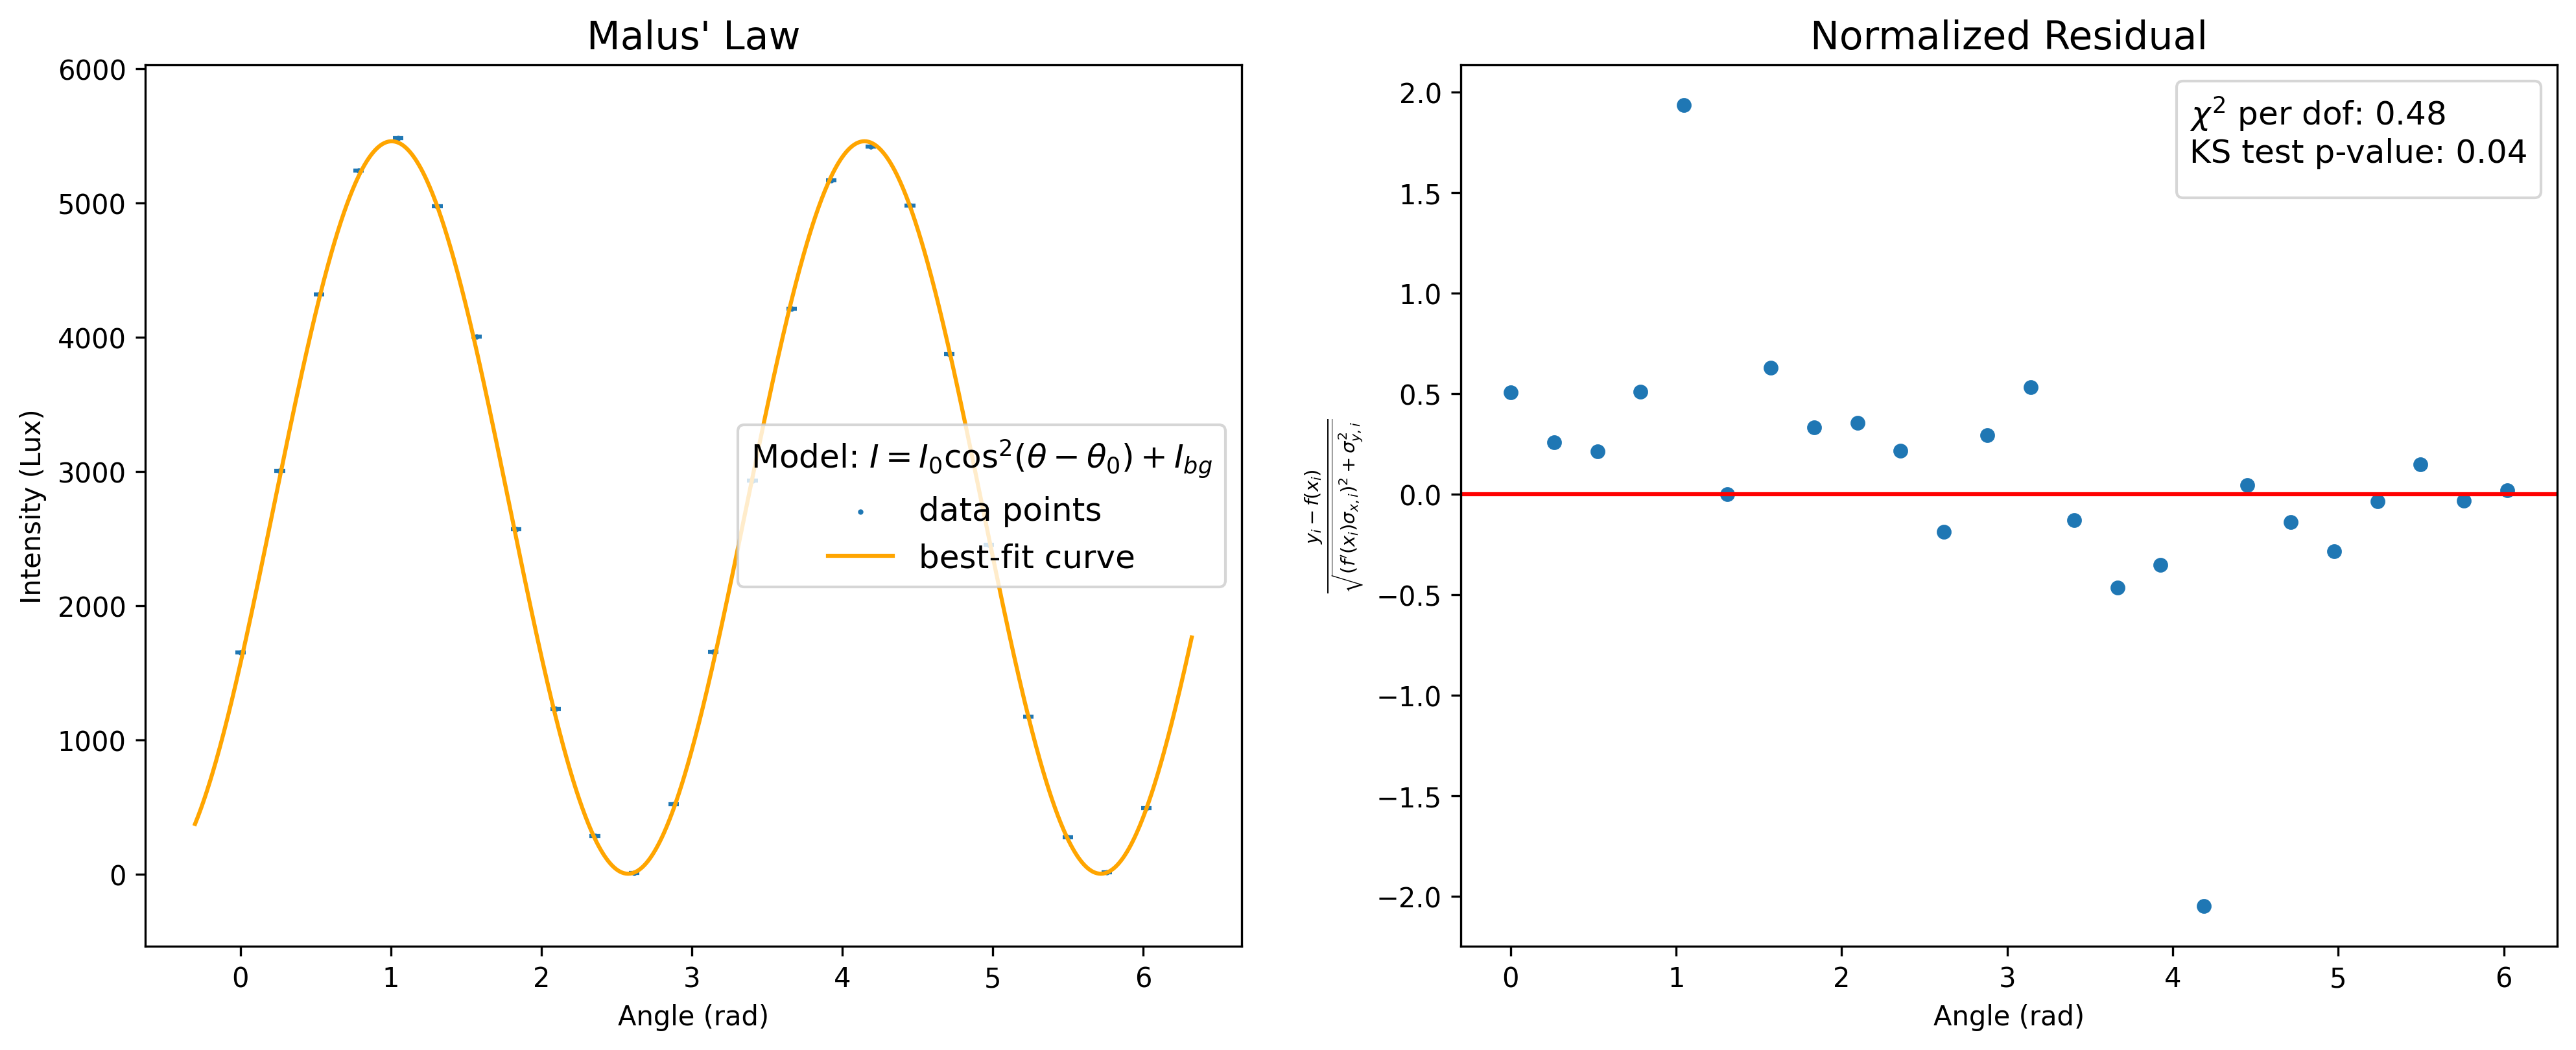

In [4]:
fit_and_plot(
    expmodel,
    df["Angle"]/180*np.pi, 
    df["Intensity"],
    df["Angle Uncertainty"]/180*np.pi,
    df["Uncertainty"],
    3,
    None,
    "Angle (rad)",
    "Intensity (Lux)",
    "Malus' Law",
    r"$I = I_0\cos^2(\theta - \theta_0) + I_{bg}$",
    True,
    );

In [5]:
df = pd.read_csv("../data/5CL Lab 2 - 1.2.csv")
df

,Photosensor Pos,Lamp Pos,Lux 6000,Uncertainty 6000,Lux 600,Uncertainty 600,Unnamed: 6,Unnamed: 7
0,25,43,7238.00,44.50,NaN,NaN,2,0.250000
1,25,44,5266.00,30.57,NaN,NaN,3,0.111111
2,25,45,3360.00,14.37,NaN,NaN,4,0.062500
3,25,46,2844.00,19.64,NaN,NaN,5,0.040000
4,25,47,2240.00,8.89,NaN,NaN,6,0.027778
5,25,48,1609.00,7.57,NaN,NaN,7,0.020408
6,25,49,1407.00,18.40,NaN,NaN,8,0.015625
7,25,50,1090.00,5.00,NaN,NaN,9,0.012346
8,25,51,926.30,7.85,NaN,NaN,10,0.010000
9,25,52,770.10,6.60,NaN,NaN,11,0.008264


In [13]:
class Exp2Model:
    def forward(self, x, x0, I0, Ibg):
        return I0*1/np.square(x - x0) + Ibg
    def backward(self, x, x0, I0, Ibg):
        return -I0*1/np.power(x - x0, 3) + Ibg
exp2model = Exp2Model()

[[3.86988860e+01 1.73809748e-01]
 [1.44434853e+05 4.32502010e+03]
 [1.09123768e+01 3.86606153e+00]]


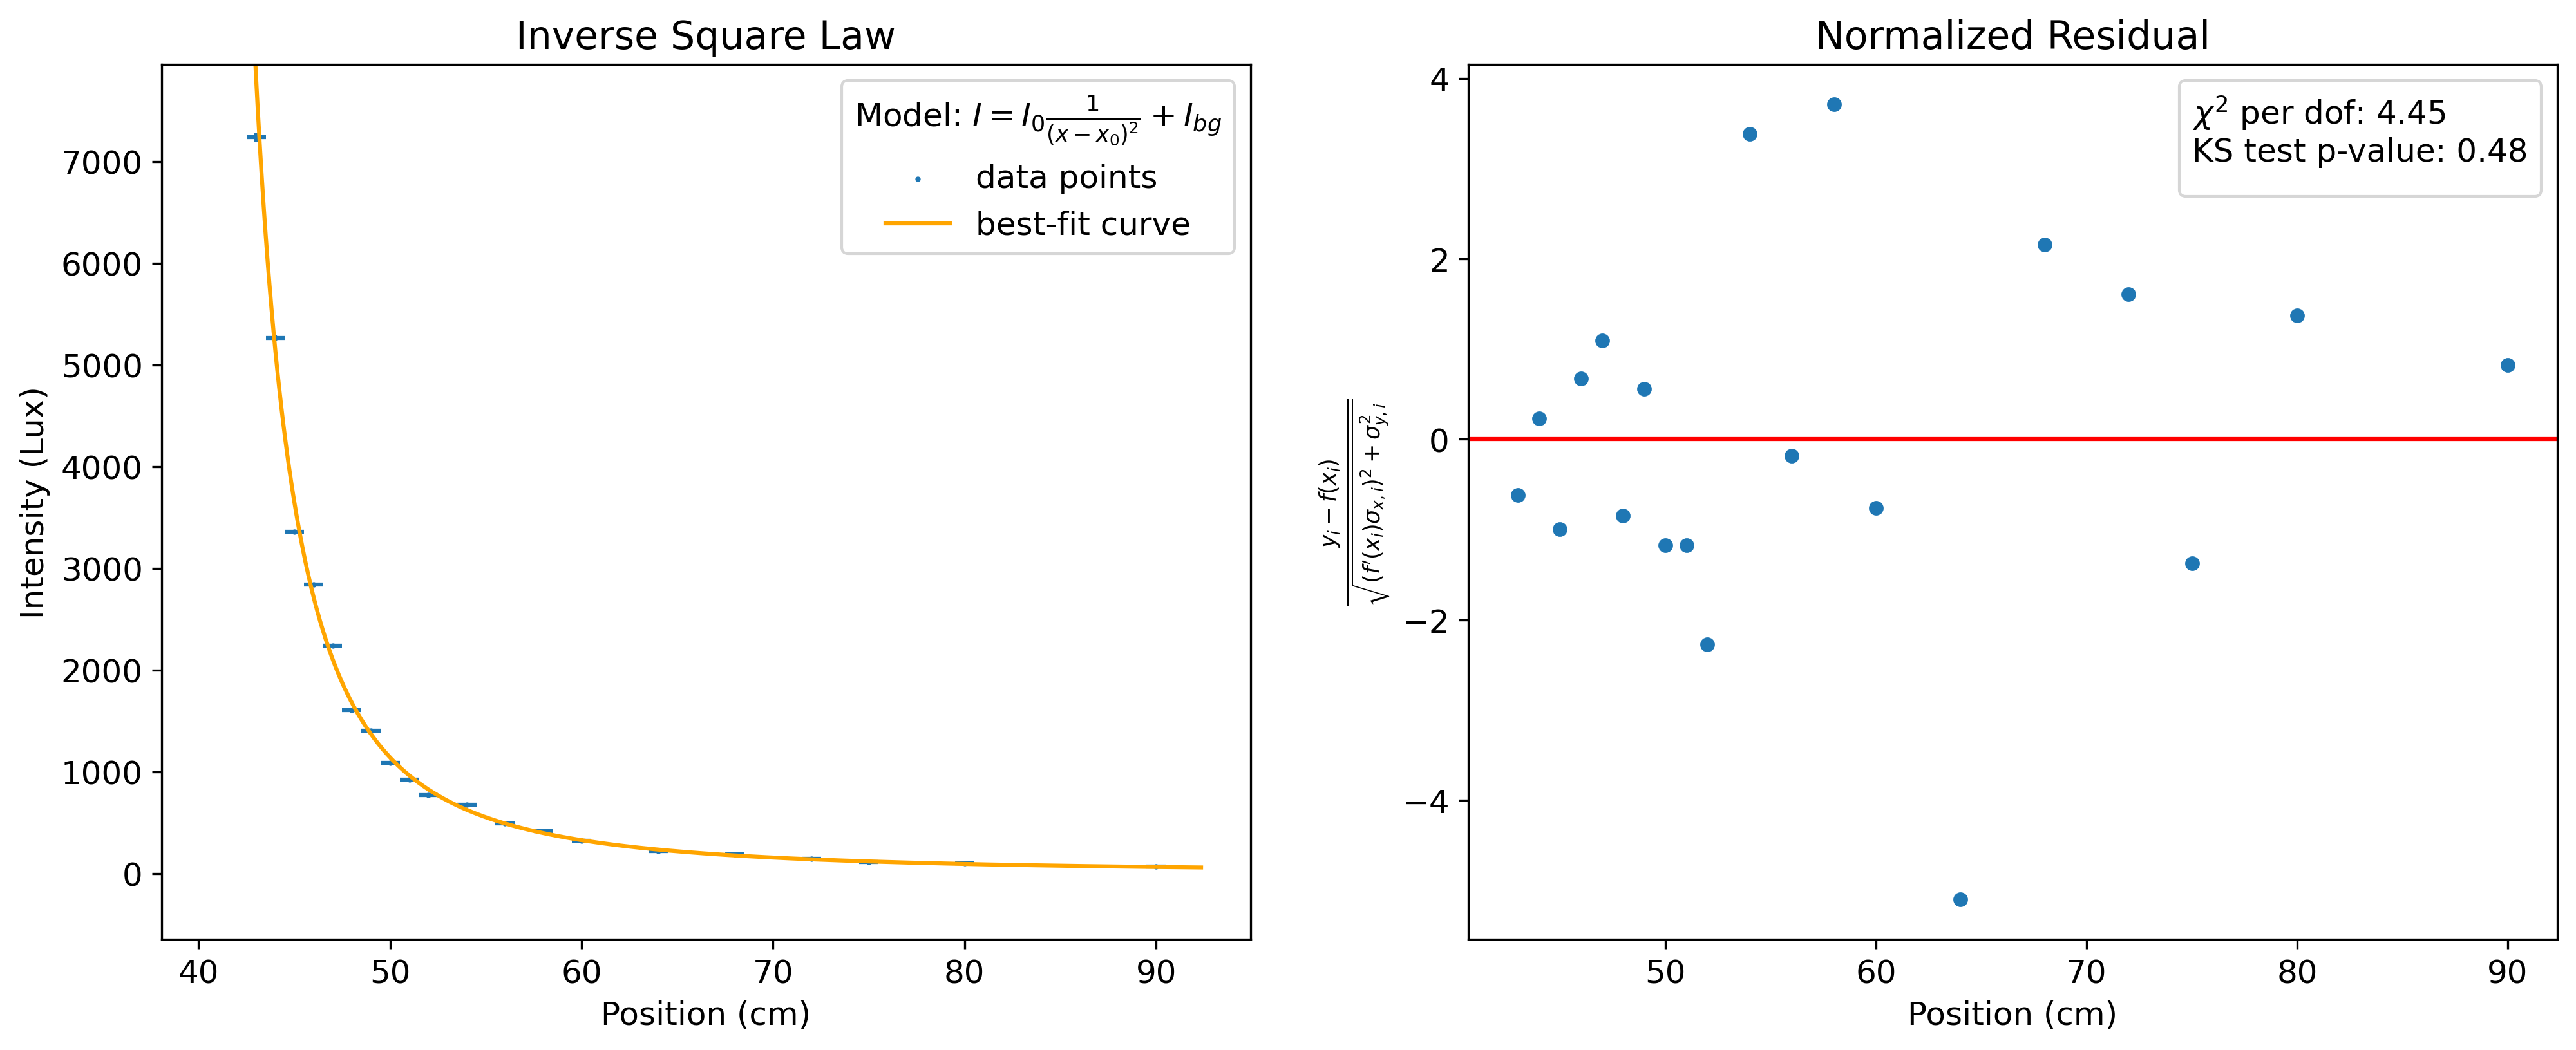

In [17]:
fit_and_plot(
    exp2model,
    df["Lamp Pos"], 
    df["Lux 6000"],
    0.5*np.ones_like(df["Lamp Pos"]),
    df["Uncertainty 6000"],
    3,
    [41, 1000, 0],
    "Position (cm)",
    "Intensity (Lux)",
    "Inverse Square Law",
    r"$I = I_0\frac{1}{(x - x_0)^2} + I_{bg}$",
    True,
    );